In [2]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading dataset in pandas Dataframe 
df = pd.read_csv('data/concrete_data.csv')

In [4]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
# checking shape of df
df.shape

(1030, 9)

Our Dataset has 1030 rows and 9 columns

In [6]:
# checking for columns
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [7]:
# checking the dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


We have only numerical features in our datset

In [8]:
# checking for null values
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

Our dataset has no null values

In [9]:
# checking for duplicates
df.duplicated().sum()

25

We have 25 duplicate values which will not contribute to model training therefore we can drop them but first let's check them.

In [10]:
df[df.duplicated()]

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
100,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
103,425.0,106.3,0.0,153.5,16.5,852.1,887.1,7,49.20
109,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
111,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
123,425.0,106.3,0.0,153.5,16.5,852.1,887.1,28,60.29


Since we can see the duplicated values we will delete them and keep the first of every duplicated values.

In [11]:
df.drop_duplicates(keep='first', inplace=True)

In [12]:
df.duplicated().sum()

0

Hence All Duplicate values has been handled.

In [13]:
# Checking some statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
blast_furnace_slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
fly_ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
superplasticizer,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
coarse_aggregate,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
fine_aggregate,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
concrete_compressive_strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


# Conclusion
    1. Fly ash content in the concrete samples varies significantly, ranging from 0.00 to 200.1. However, the majority of samples (at least 75%) have a fly ash content of 118.30 or lower. Additionally, around 50% of the samples have no fly ash content (0.00), as indicated by the median value.
    2. In age column we can observe that the maximum value of 365.00 is significantly higher than the 75% quartile value of 56.00. This difference indicates the presence of potential outliers, specifically concrete samples with very high ages compared to the majority of the dataset.

# Data Visualisation

In [14]:
numerical_columns = ['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
                    'coarse_aggregate', 'fine_aggregate ', 'age',
                    'concrete_compressive_strength']

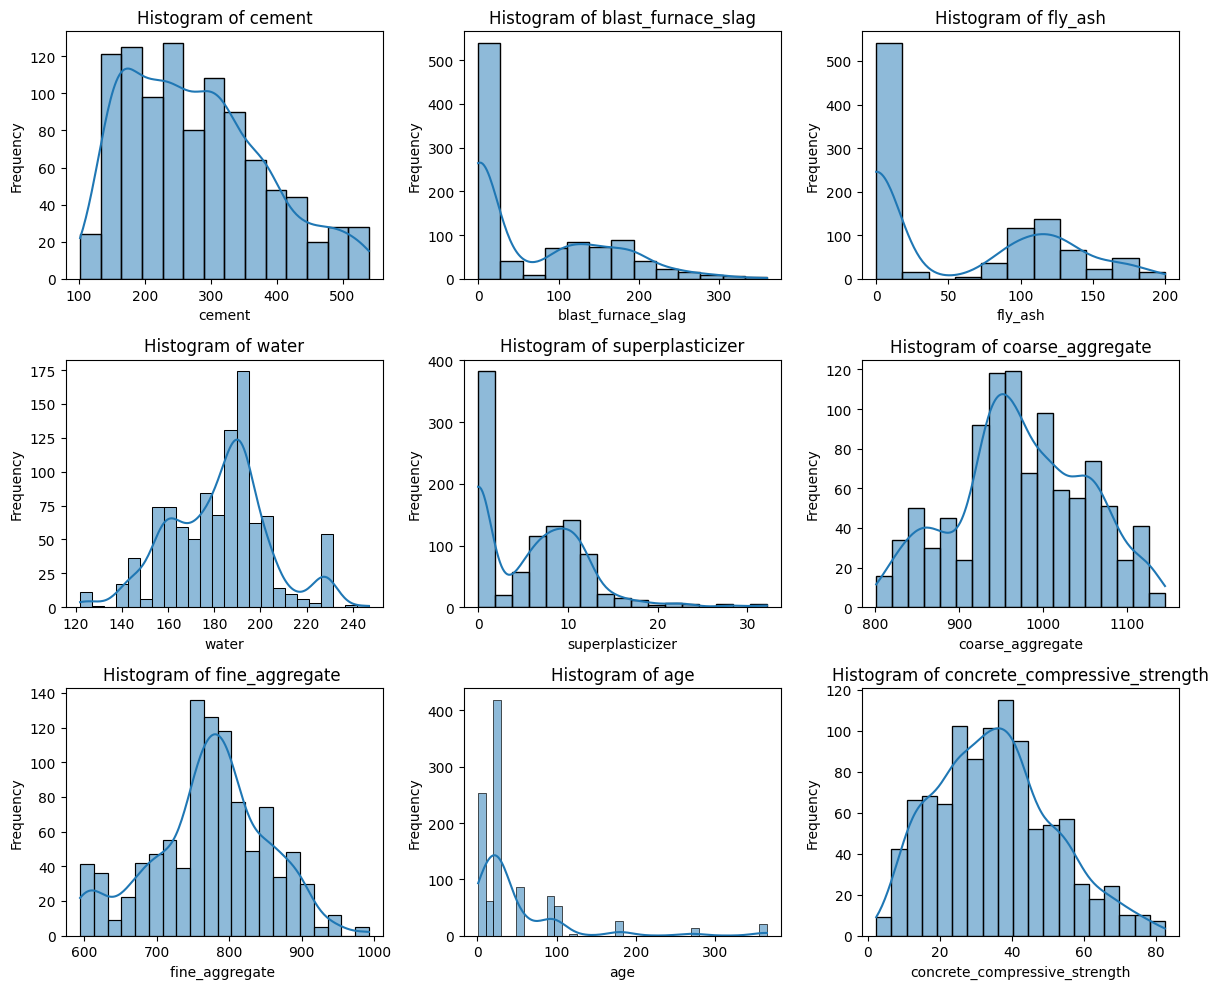

In [15]:
# Histogram
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

# Flatten the axes array to make it easier to access
axes = axes.flatten()

# Iterate over each numerical column and create histograms
for i, column in enumerate(numerical_columns):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {column}')
# Adjust the spacing between subplots
fig.tight_layout()
# Display the subplots
plt.show()

# Conclusion
    1. Plot of cement tell us that the data is skewed and majority of data is present in lower end of the range.
    2. Plot of blast_furnace_slag, fly_ash and superplasticizer tell the same story but the majority of data in these two are zero.
    3. Plot of water,coarse_aggregate and fine_aggregate follows a normal distribution.
    4. Plot of age is highly right skewed and suggest the presence of potential outliers we will use box-plot to confirm that.
    5. Plot of concrete_compressive_strength is little bit skewed.

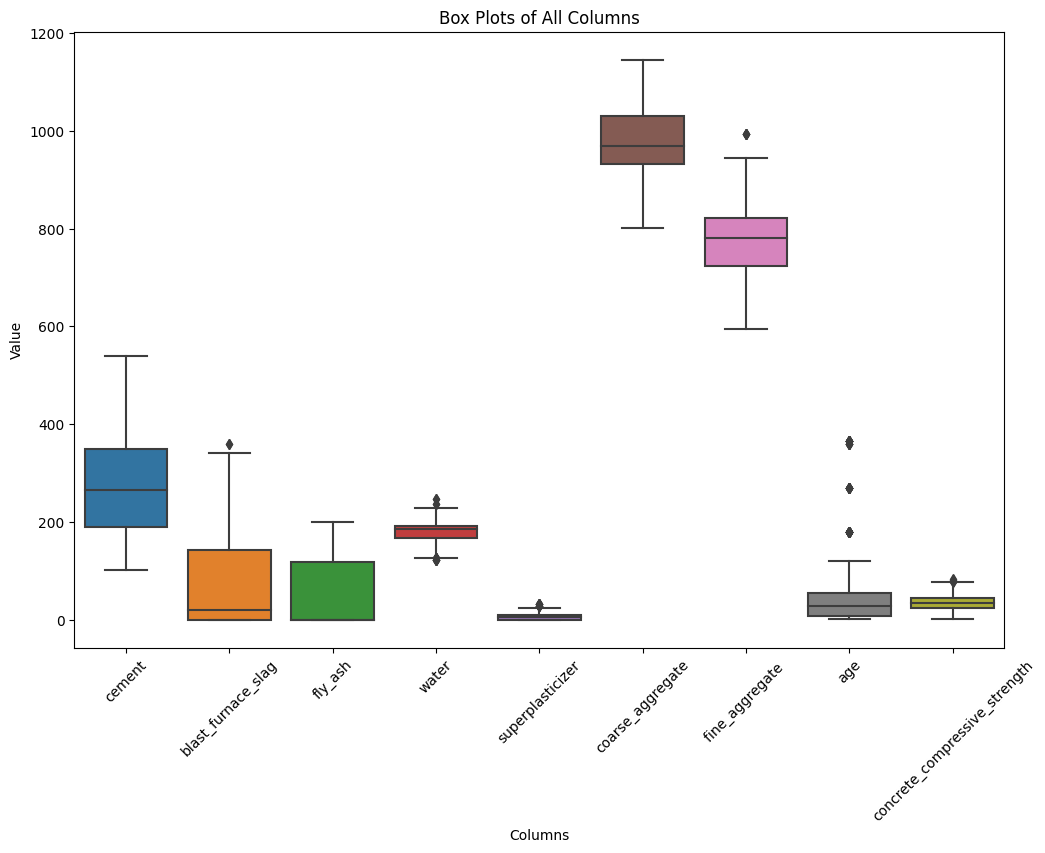

In [16]:
# Box-plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.xlabel('Columns')
plt.ylabel('Value')
plt.title('Box Plots of All Columns')

# Display the plot
plt.show()

We can see that there are outliers present in many columns and also data is not in same scale therefore we will use scaling techniques to handle these problems

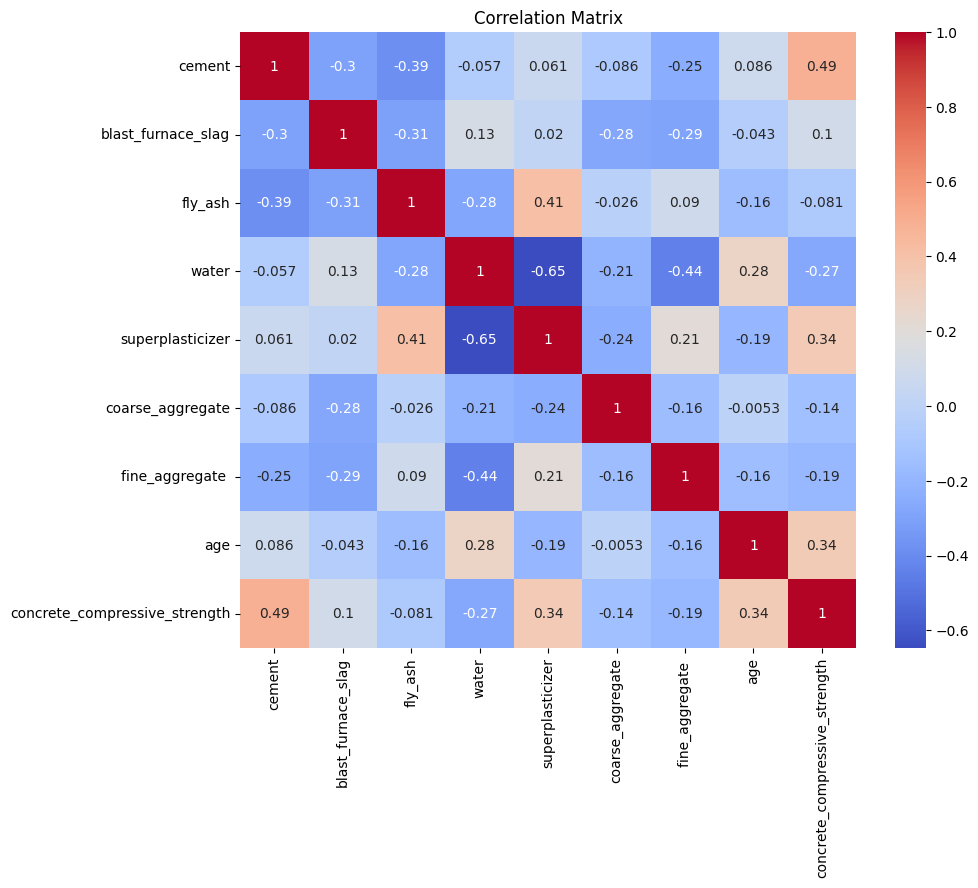

In [17]:
# Correlation Matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')

# Display the plot
plt.show()

# Conclusion
    1. Cement has a strong positive correlation (0.488) with the concrete compressive strength. This indicates that higher cement content generally leads to higher compressive strength.
    2. Water has a moderate negative correlation (-0.27) with the concrete compressive strength. This suggests that higher water content tends to result in lower compressive strength.
    3. Superplasticizer shows a moderate positive correlation (0.344) with the concrete compressive strength. This implies that the presence of superplasticizer can enhance the compressive strength of the concrete.
    4. Blast_furnace_slag, fly ash, fine aggregate, and coarse aggregate have relatively weak correlations with the concrete compressive strength. Their correlations range from -0.19 to 0.10, indicating a weaker relationship.
    5. Age exhibits a moderate positive correlation (0.337) with the concrete compressive strength. This suggests that the concrete's compressive strength tends to increase with age, likely due to ongoing hydration and curing processes.

# Scaling of data 
Now we will scale our data through different methods like standardscaler, robustscaler, minmaxscaler, powertransformer, quantiletransformer then we will plot some graphs and choose best scaler among them

In [19]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, QuantileTransformer, PowerTransformer

In [22]:
scalers = [
    StandardScaler(),
    RobustScaler(),
    MinMaxScaler(),
    QuantileTransformer(output_distribution='normal'),
    PowerTransformer(method='yeo-johnson')
]

In [23]:
scaled_dfs = []
for scaler in scalers:
    scaled_data = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
    scaled_dfs.append(scaled_df)

In [24]:
all_dataframes = [df] + scaled_dfs
all_labels = ['Original'] + [scaler.__class__.__name__ for scaler in scalers]

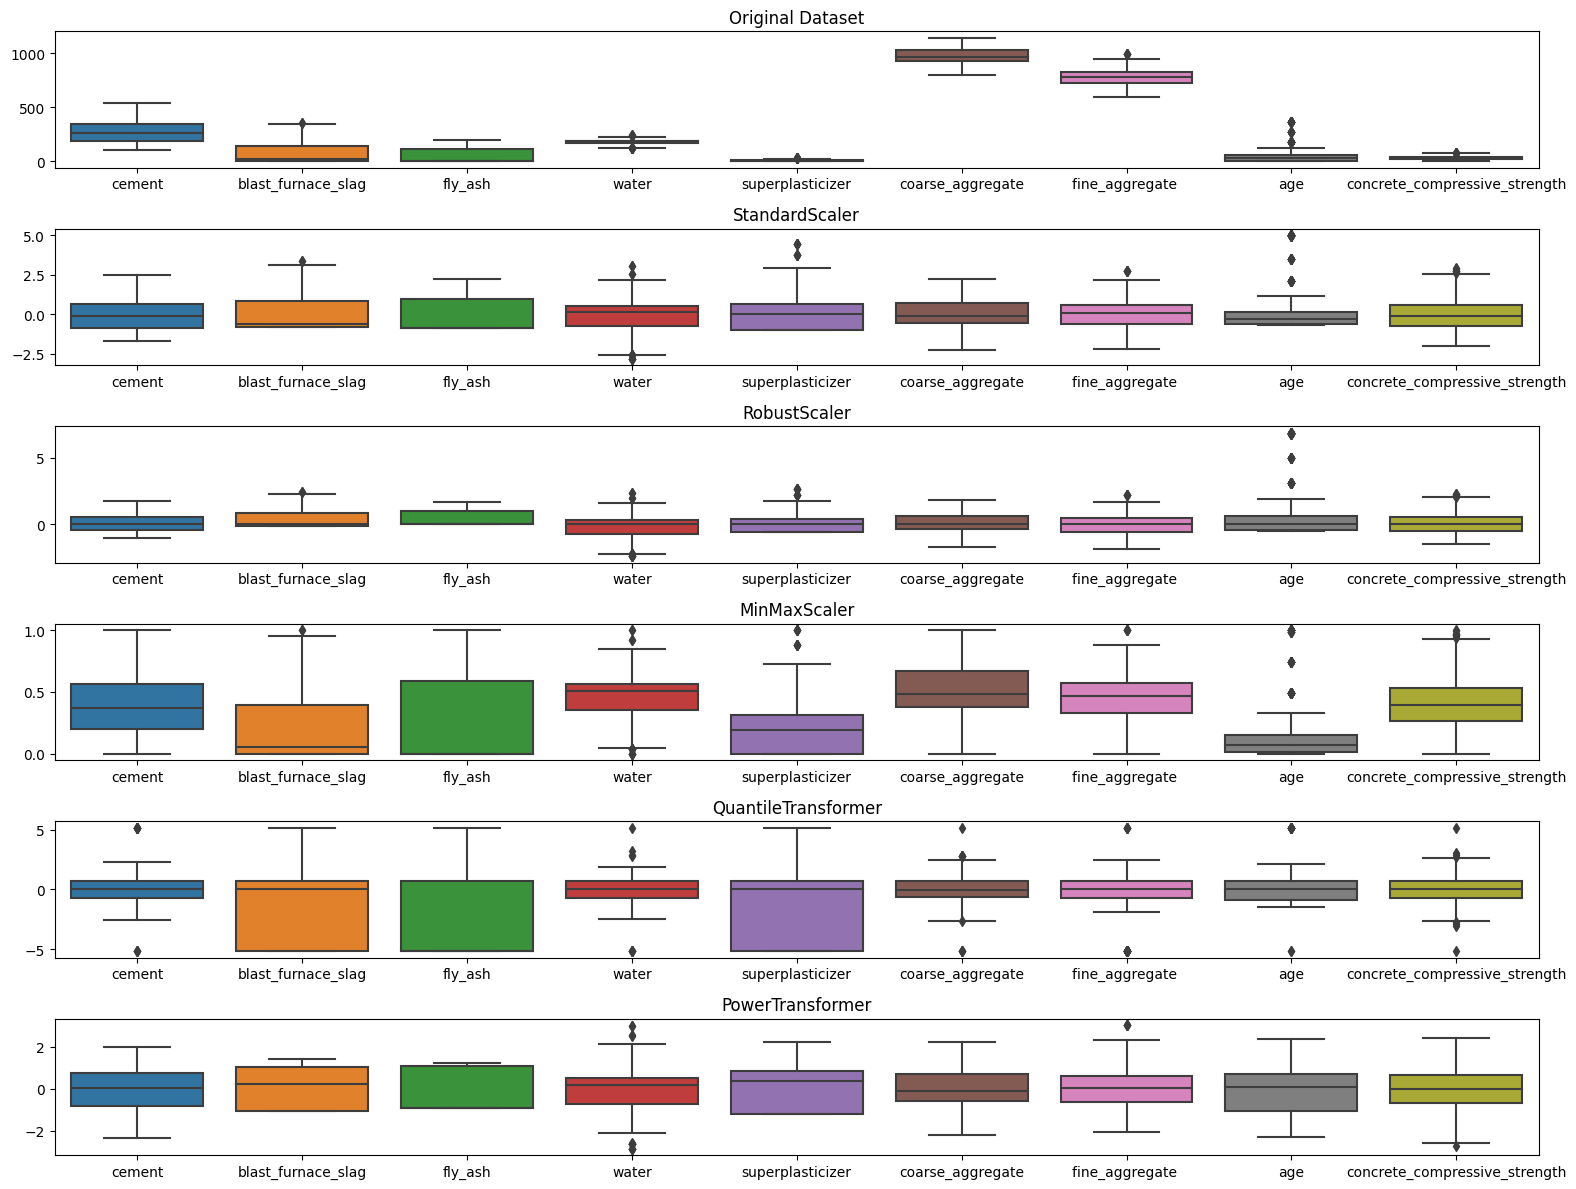

In [30]:
# Create separate plots for the original dataset and each scaling technique
fig, axes = plt.subplots(nrows=len(scalers) + 1, ncols=1, figsize=(16, 12))

# Plot the box plot for the original dataset
sns.boxplot(data=df, ax=axes[0])
axes[0].set_title('Original Dataset')

# Plot the box plots for each scaling technique
for i, scaler in enumerate(scalers, start=1):
    scaled_data = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
    sns.boxplot(data=scaled_df, ax=axes[i])
    axes[i].set_title(scaler.__class__.__name__)

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

# Conclusion
We can observe that PowerTransformer with 'yeo-johnson' method is the best scaler. So we will use this during model_training.